## Group 15 - Contraceptive method used among Indonesian women

Kenna Roozendaal, Joy Cai, Naura Ambareswari

#### Introduction

Indonesia experienced a notable decline in its fertility rates between 1984 and 1987. The increased use of contraceptives is a significant factor in the drop in fertility due to more women gaining access to and awareness of available family planning resources compared to previous years. To better understand and address the declining fertility trend, the National Indonesia Contraceptive Prevalence Survey conducted a survey on family planning as well as collected women’s sociodemographic background.

The data taken from the survey will be used to answer the question *“Given the wife's age, religion, and standard of living, what is the preferred contraceptive method used?”*. We will be using the Contraceptive Method Choice Data Set that sampled married women in Indonesia who were not pregnant or were unaware they were pregnant (Lim, 1997). The goal was to predict women’s contraceptive method of choice (no use, long-term methods, short-term methods) based on characteristics like age, religion, standard of living, education, etc.

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice 

#### Methods

First, the dataset will need to be filtered in order to only get the columns that are relvant to answering the question. Since there are no headers provided with the dataset, they will need to be manually set. The columns used from the dataset are wife’s age, religion, education, standard of living, and contraceptive method used. Religion was chosen as a predictor because it influences the type of contraceptive used and Indonesia holds the largest Muslim population (Hefner, 2020; Hill et al., 2014). Education and age are predictors because age, socioeconomic level, and level of education, particularly educational lag, have been found to impact women’s contraceptive methods (Sámano et al., 2019). 

RELEVANT COLUMNS:
- Wife's age
- Wife's education level (1=low 2,3,4=high)
- Wife's religion (0=not Islam 1=Islam)
- Standard of living (1=low 2,3,4=high)
- Contraceptive method used (1= no use 2=long-term 3=short-term)

Aftering filtering the dataset, will be read into Python and the data will be split into a training and testing set, 75% for the training set and 25% for the testing set. This will allow us to evaluate the accuracy of our model for predicting the prefered method of contraception. To create the most accurate predictor, the model will be tuned by testing different k-values for k-nearest neighbors. As such, a standard <code>5-fold-cross-validation</code> will be conducted using the GridSearchCV method from the scikit-learn package. Using the best value for k, the model with maximized efficiency can be used.

Using the tuned model, we will be able to predict the method of contraception used given information about the wife using the <code>predict</code> method. 


#### Expected outcomes and significance

Women with a higher standard of living and higher education level tend to use contraceptives longer than other groups because they are more aware of the available family planning resources and other resources beyond what the government offers. Alternately, women with lower education levels and a lower standard of living are more likely to use contraceptives for a shorter period or not use them at all (Iseyemi et al., 2017). 

Predicting women’s contraceptive choice can help healthcare providers and policymakers ensure proper access to their preferred contraception. Identifying sociodemographic groups that use or do not use contraceptives can assess disparities in access, utilization, and education of contraception. Despite Indonesia’s decline in fertility, contraceptive use can lower rates of unplanned pregnancies as well as maternal and infant mortality. 
This research can further inquire on the accessibility of contraception and family planning for all sociodemographic groups in Indonesia, and how it can be improved in order to ensure equality and promote autonomy and control over women’s reproductive health. 


#### Preliminary exploratory data analysis

We first want to load the csv file into a dataframe so that we can better visualize the data. Appropriate headers are added and only the columns that have variables that are not related to the question are removed.

In [1]:
import altair as alt
import numpy as np
import pandas as pd
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

alt.data_transformers.disable_max_rows()
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [2]:
cmc_dataset = pd.read_csv("data/cmc.data.csv", header=None,
                     names=[
                         "wife_age", 
                         "wife_education", #1=low 2,3,4=high
                         "husband_education", #1=low 2,3,4=high
                         "num_children_born",
                         "wife_religion", #0=not Islam 1=Islam
                         "wife_working", #0=yes 1=no
                         "husband_occupation", #1,2,3,4 (categorical)
                         "standard_of_living_index", #1=low 2,3,4=high
                         "media_exposure", #0=good 1=not good
                         "contraceptive_method_used", #1= no use 2=long-term 3=short-term
                     ]
                     )
cmc_dataset

,wife_age,wife_education,husband_education,num_children_born,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [3]:
cmc_dataset_filtered = cmc_dataset.loc[:, ["wife_age", "wife_education","wife_religion","standard_of_living_index", "contraceptive_method_used"]]
cmc_dataset_filtered

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used
0,24,2,1,3,1
1,45,1,1,4,1
2,43,2,1,4,1
3,42,3,1,3,1
4,36,3,1,2,1
...,...,...,...,...,...
1468,33,4,1,4,3
1469,33,4,1,4,3
1470,39,3,1,4,3
1471,33,3,1,2,3


Now we want to split our data into a training and testing set. The preliminary data analysis will be an exploratory analysis that uses data from the training set only. In order to reduce human bias, only the training set will be visualized. For this project, the dataset will be split 75% training and 25% testing. 

In [4]:
cmc_train, cmc_test = train_test_split(cmc_dataset_filtered, test_size=0.25, random_state=123)
cmc_train.head()

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used
1208,40,1,1,2,1
1297,35,4,1,4,2
736,19,3,1,3,3
186,20,2,1,2,1
1027,41,2,0,2,1


In our preliminary analysis, we want to be able to summarize useful information about the training set in a table. As such, we want to be able to see if there is any missing data, and the means and medians of our predictor variables. 

In [5]:
missing_data = cmc_train.isna().sum()
missing_data

wife_age                     0
wife_education               0
wife_religion                0
standard_of_living_index     0
contraceptive_method_used    0
dtype: int64

There is no missing data in our dataset, thus we do not need to filter out any incomplete rows.

In [6]:
variable_agg = cmc_train.agg(["mean", "median", "max", "min"])
variable_agg

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used
mean,32.570652,2.950181,0.856884,3.130435,1.906703
median,32.000000,3.000000,1.000000,3.000000,2.000000
max,49.000000,4.000000,1.000000,4.000000,3.000000
min,16.000000,1.000000,0.000000,1.000000,1.000000


From the table above, we are able to obtain information about the distribution of the data in the training set. The mean and median gives an idea of the distribution of the data and which groups are dominant for each predictor. Using the min and max, we can confirm that observations spanning the entire range of the dataset are included. 

**Visualization**

We chose our predictors based on academic papers that have found a correlation between each variable and the method of contraception used. As such we want to be able to see if each variable demonstrates a clear correlation. 

**Wife's age**

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


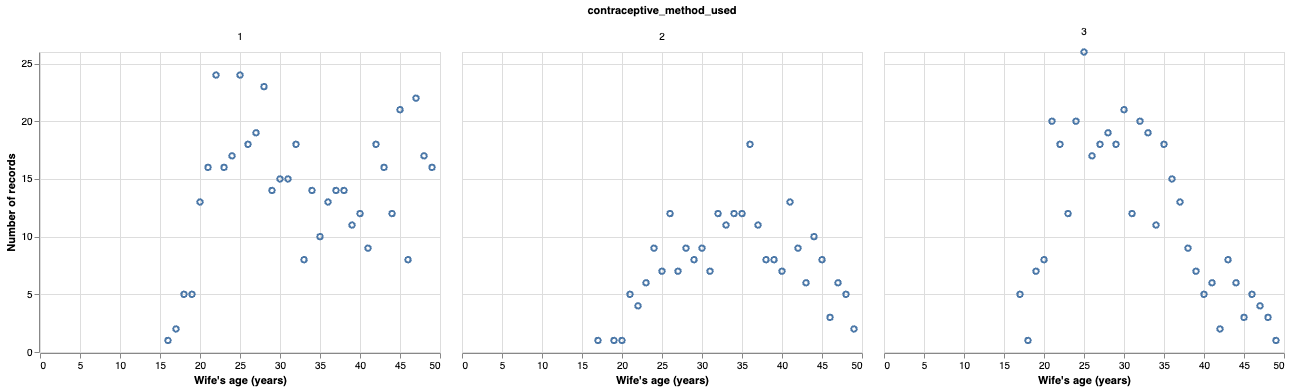

In [7]:
wife_age_correlation = alt.Chart(cmc_train, title = "Age vs. Method of Contraception Used").mark_point().encode(
    x = alt.X("wife_age", title = "Wife's age (years)"),
    y = alt.Y("count()", title = "Number of records"),
).facet("contraceptive_method_used")
wife_age_correlation

There does not seem to be a clear correlation between age and no method of contraception used. However, for short-term and long-term contraception, we can clearly see a peak at around 35 and 30 years old respectively. 

**Wife's education**

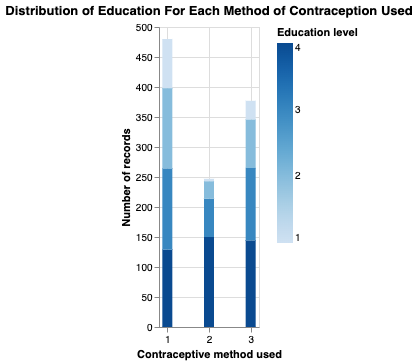

In [8]:
wife_education_correlation = alt.Chart(cmc_train, title = "Distribution of Education For Each Method of Contraception Used").mark_bar(size=10).encode(
    x = alt.X("contraceptive_method_used", title = "Contraceptive method used"),
    y = alt.Y("count()", title = "Number of records"),
    color = alt.Color("wife_education",legend=alt.Legend(title="Education level"))
).properties(width=100)
wife_education_correlation

From the graph, we can see that as the level of education increases, there is a greater proportion of of women who chose to use contraceptives. 

**Standard of living**

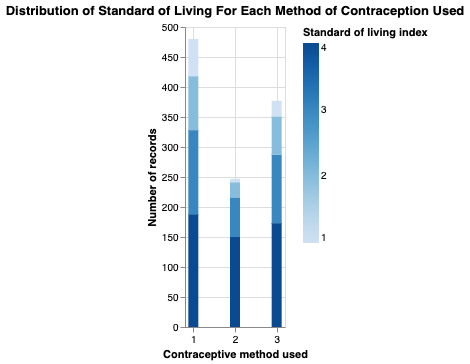

In [9]:
living_standard_correlation = alt.Chart(cmc_train, title = "Distribution of Standard of Living For Each Method of Contraception Used").mark_bar(size=10).encode(
    x = alt.X("contraceptive_method_used", title = "Contraceptive method used"),
    y = alt.Y("count()", title = "Number of records"),
    color = alt.Color("standard_of_living_index", legend=alt.Legend(title="Standard of living index"))
).properties(width=100)
living_standard_correlation

For individuals who have a standard of living of 1-3, it can clearly be seen that the proportion that use contraceptions decreases significantly for short-term (2) and long-term (3) methods. In addition, a larger percentage of the bars for 2 and 3 are taken up by individuals with a very high standard of living (4), meaning that there is a greater proportion that use contraceptives. 

**Religion**

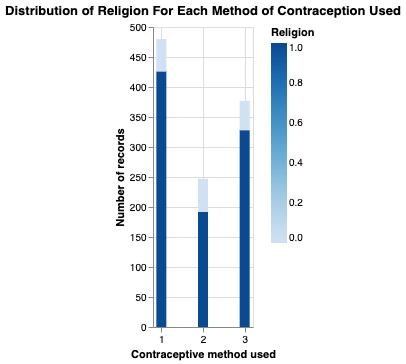

In [10]:
wife_religion_correlation = alt.Chart(cmc_train, title = "Distribution of Religion For Each Method of Contraception Used").mark_bar(size=10).encode(
    x = alt.X("contraceptive_method_used", title = "Contraceptive method used"),
    y = alt.Y("count()", title = "Number of records"),
    color = alt.Color("wife_religion", legend=alt.Legend(title="Religion"))
).properties(width=100)
wife_religion_correlation

From the graph, we can see that the greater number of women surveyed were religious and used no method of contraception. However, when focusing on the invididual bars, the distribution of religion and non-religious women for each method of contraception does not differ greatly. 

In [11]:
#make preprocessor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
     (StandardScaler(), ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['wife_age', 'wife_education', 'wife_religion',
                                  'standard_of_living_index'])])

In [34]:
#choosing K
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
X = cmc_train.loc[:, ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]]
y = cmc_train["contraceptive_method_used"]


In [35]:
#make pipeline
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessor, knn)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['wife_age', 'wife_education',
                                                   'wife_religion',
                                                   'standard_of_living_index'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [36]:
#specify grid of parameter values
pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    ['wife_age', 'wife_education', 'wife_religion',
                                     'standard_of_living_index'])])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  ['wife_age', 'wife_education', 'wife_religion',
                                   'standard_of_living_index'])]),
 'kneighborsclassifier': KNeighborsClassifier(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('standardscaler',
   StandardScaler(),
   ['wife_age',
    'wife_education',
    'wife_religion',
    'standard_of_living_index'])],
 'columntransformer__

In [37]:
#make parameter grid
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 100, 5),
}
param_grid

{'kneighborsclassifier__n_neighbors': range(1, 100, 5)}

In [38]:
#create GridSearchCV object
from sklearn.model_selection import GridSearchCV

cmc_tune_grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5
)
cmc_tune_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['wife_age',
                                                                          'wife_education',
                                                                          'wife_religion',
                                                                          'standard_of_living_index'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 100, 5)})

In [41]:
#use fit to begin tuning process
accuracies_grid = pd.DataFrame(
    cmc_tune_grid
    .fit(cmc_train.loc[:, ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]],
         cmc_train["contraceptive_method_used"]
        ).cv_results_)
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009251,0.001838,0.022522,0.004101,1,{'kneighborsclassifier__n_neighbors': 1},0.407240,0.393665,0.457014,0.420814,0.431818,0.422110,0.021654,20
1,0.008802,0.000878,0.022918,0.003899,6,{'kneighborsclassifier__n_neighbors': 6},0.475113,0.434389,0.447964,0.466063,0.459091,0.456524,0.014187,16
2,0.011961,0.000281,0.031469,0.000547,11,{'kneighborsclassifier__n_neighbors': 11},0.470588,0.479638,0.475113,0.447964,0.459091,0.466479,0.011506,11
3,0.014436,0.003463,0.031962,0.001146,16,{'kneighborsclassifier__n_neighbors': 16},0.479638,0.470588,0.466063,0.429864,0.390909,0.447413,0.032936,19
4,0.015102,0.013206,0.027347,0.012186,21,{'kneighborsclassifier__n_neighbors': 21},0.484163,0.452489,0.457014,0.452489,0.413636,0.451958,0.022503,17
5,0.014513,0.013931,0.021857,0.001235,26,{'kneighborsclassifier__n_neighbors': 26},0.479638,0.452489,0.479638,0.407240,0.422727,0.448346,0.029399,18
6,0.007821,0.000539,0.032301,0.017940,31,{'kneighborsclassifier__n_neighbors': 31},0.502262,0.443439,0.502262,0.434389,0.413636,0.459198,0.036466,15
7,0.007347,0.000701,0.036634,0.019003,36,{'kneighborsclassifier__n_neighbors': 36},0.497738,0.429864,0.502262,0.452489,0.422727,0.461016,0.033343,12
8,0.008131,0.000845,0.026556,0.002323,41,{'kneighborsclassifier__n_neighbors': 41},0.475113,0.429864,0.506787,0.461538,0.422727,0.459206,0.030705,14
9,0.008690,0.000506,0.024360,0.001310,46,{'kneighborsclassifier__n_neighbors': 46},0.488688,0.443439,0.511312,0.443439,0.418182,0.461012,0.033906,13


/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


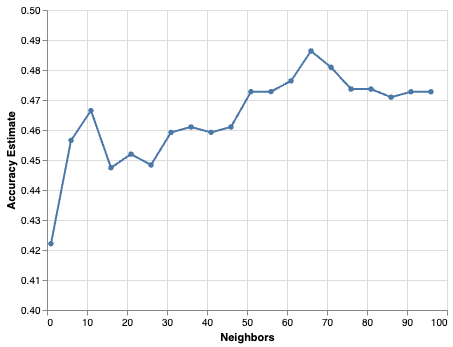

In [42]:
#use a graph to determine the K value with the highest accuracy
accuracy_vs_k = (
    alt.Chart(accuracies_grid)
    .mark_line(point=True)
    .encode(
        x=alt.X("param_kneighborsclassifier__n_neighbors", title="Neighbors",
               ),
        y=alt.Y("mean_test_score",
                title="Accuracy Estimate",
               scale=alt.Scale(domain=(0.40, 0.50)),
    )
    ))
accuracy_vs_k

In [43]:
#choose K value of 65
knn = KNeighborsClassifier(n_neighbors=65)
X = cmc_test.loc[:, ["wife_age", "wife_education", "wife_religion", "standard_of_living_index"]]
y = cmc_test["contraceptive_method_used"]

In [44]:
#make pipeline
knn_fit = make_pipeline(preprocessor, knn).fit(X, y)
knn_fit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['wife_age', 'wife_education',
                                                   'wife_religion',
                                                   'standard_of_living_index'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=65))])

In [45]:
#make predictions using test set
cmc_test_predictions = cmc_test.assign(
    predicted = knn_fit.predict(X))
cmc_test_predictions

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used,predicted
42,48,2,1,3,1,1
76,29,4,1,4,1,2
1383,26,3,1,4,3,3
252,25,3,1,2,1,3
388,28,2,1,4,1,3
...,...,...,...,...,...,...
274,23,3,1,3,1,1
982,36,4,0,4,3,2
1413,22,3,1,3,3,1
55,20,2,1,2,1,3


In [46]:
#compute accuracy by checking number of correct/incorrect predictions
correct_preds = cmc_test_predictions[
    cmc_test_predictions["contraceptive_method_used"] == cmc_test_predictions["predicted"]
]
correct_preds

,wife_age,wife_education,wife_religion,standard_of_living_index,contraceptive_method_used,predicted
42,48,2,1,3,1,1
1383,26,3,1,4,3,3
35,42,1,1,2,1,1
1026,39,2,1,2,1,1
694,26,2,1,4,3,3
...,...,...,...,...,...,...
944,25,2,1,1,3,3
240,19,3,1,3,1,1
120,38,1,1,4,1,1
274,23,3,1,3,1,1


#### References

Hefner, R. W. (2020). Islam and covenantal pluralism in Indonesia: A critical juncture analysis. The Review of Faith & International Affairs, 18(2), 1-17.

Hill, N. J., Siwatu, M., & Robinson, A. K. (2014). “My religion picked my birth control”: The influence of religion on contraceptive use. Journal of religion and health, 53, 825-833.

Iseyemi, A., Zhao, Q., McNicholas, C., & Peipert, J. F. (2017). Socioeconomic status as a risk factor for unintended pregnancy in the contraceptive CHOICE project. Obstetrics and gynecology, 130(3), 609.

Lim, T. (1997). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Sámano, R., Martínez-Rojano, H., Chico-Barba, G., Sánchez-Jiménez, B., Sam-Soto, S., Rodríguez-Ventura, A. L., ... & Sclavo-Melo, S. (2019). Sociodemographic factors associated with the knowledge and use of birth control methods in adolescents before and after pregnancy. International journal of environmental research and public health, 16(6), 1022.
